# Set up

## Google Drive Set-up

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Set current working directory to the project folder in gdrive
import os
root_dir = os.getcwd()
project_dir = root_dir + "/drive/My Drive/GA_capstone"

## Import Libraries

In [14]:
!pip install patchify
!pip install split-folders


In [49]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
from patchify import patchify
import splitfolders


## Useful Functions

In [55]:
def split_image(patch_size, image_dir, dataset_dir, mask = False):
  # Loop into the directories and get images
  for root, sub_dirs, files in os.walk(image_dir): # get image directory and each file name
    for file in files: 
      #print(file)
      img_path = os.path.join(root, file)
      if mask:
        image = cv2.imread(img_path, 0) # this is the actual image read from the image path
      else:
        image = cv2.imread(img_path, 1) # this is the actual image read from the image path

      # Plot the image before croppping
      """plt.figure()
      f, ax = plt.subplots(1,2, figsize = (20, 8))
      ax[0].imshow(image)
      ax[0].set_title(f"Before Crop: {image.shape}")"""
      
      ## We will now divide the large image into patches of smaller images 
      # first, crop the image to a size which is closest to the size divisible by 256
      size_x = (image.shape[1] // patch_size) * patch_size # Get the closest size
      size_y = (image.shape[0] // patch_size) * patch_size # Get the closest size
      image = Image.fromarray(image) # Using pillow, convert the image np array into a PIL image in order to use the crop function
      image = image.crop((0 ,0, size_x, size_y)) # PIL.Image.crop(box) --> box defines the "coordinate" of the crop area we want
      image = np.array(image) # Then, convert the image back to np array
      
      # Plot image after cropping
      """ax[1].imshow(image)
      ax[1].set_title(f"After Crop: {image.shape}")"""

      # Next, get the smaller patches
      if mask:
        patches = patchify(image, (256, 256), step=256)  # we just need 1 dimension for masks
      else:
        patches = patchify(image, (256, 256, 3), step=256)  # RGB (3 dimensions) for images
      print(patches.shape)
      for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
          if mask:
            single_patch = patches[i,j] # Single mask
            #print(np.unique(single_patch, return_counts = True))
          else:
            single_patch = patches[i,j][0] # Single image

          # Show patch
          #print(single_patch.shape)
          #plt.imshow(single_patch[:,:,0])

          if mask:
            cv2.imwrite(dataset_dir+"256_patches/all/masks/" + file+"_patch_"+str(i)+str(j)+".tif", single_patch)
          else: 
            cv2.imwrite(dataset_dir+"256_patches/all/images/" + file+"_patch_"+str(i)+str(j)+".tif", single_patch)
          #break
        #break
      print(f"{file} done")

  
      #break

## Import Images

Dataset from: https://landcover.ai.linuxpolska.com/

In [17]:
# Visualize an image
temp_image = cv2.imread(project_dir +'/Dataset/images/M-33-7-A-d-2-3.tif')
temp_image.shape # Resolution and 3 bands

(9711, 9081, 3)

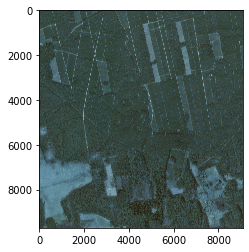

In [18]:
# Visualize all three bands
plt.imshow(temp_image[:,:]);

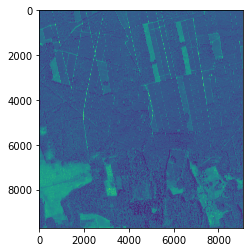

In [19]:
plt.imshow(temp_image[:,:,1])

In [20]:
# Visualize a mask
temp_mask = cv2.imread(project_dir + '/Dataset/masks/M-33-7-A-d-2-3.tif')
temp_mask.shape # Resolution and 3 bands

(9711, 9081, 3)

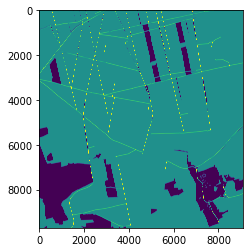

In [21]:
plt.imshow(temp_mask[:,:,1])

In [22]:
labels, count = np.unique(temp_mask[:,:,0], return_counts=True) #Check for each channel. All chanels are identical
print("Labels are: ", labels, " and the counts are: ", count)

Labels are:  [0 1 2 4]  and the counts are:  [10649007    60415 75869435  1606734]


In [ ]:
# We will read all the images to the unique labels
original_mask_dir = project_dir + "/Dataset/masks/"
for mask in os.listdir(original_mask_dir):
    temp_mask = cv2.imread(original_mask_dir+mask, 0)
    print(np.unique(temp_mask, return_counts=True))

# Data Preparation

## Divide images into smaller patches

In [53]:
# Define patch size
patch_size = 256

# Define image and mask directory
image_dir = project_dir + "/Dataset/images/"
mask_dir = project_dir + "/Dataset/masks/"

# Define dataset directory for ouput 
dataset_dir = project_dir + "/Dataset/"

In [24]:
# Split images using the pre-defined function - run once
split_image(patch_size, image_dir, dataset_dir, mask = False)

# Split masks using the predefined function - run once
split_image(patch_size, mask_dir, dataset_dir, mask = True)

"""Ran once to produce the folders"""


'Ran once to produce the folders'

## Choose only images with significantly different labels

In [25]:
"""# Directories of image patches
patch_image_dir = project_dir + "/Dataset/256_patches/all/images"

patch_mask_dir = project_dir + "/Dataset/256_patches/all/masks"

# File names of images and patches
patch_images_list = os.listdir(patch_image_dir)
patch_masks_list = os.listdir(patch_mask_dir)
print(f"No. of images: {len(patch_images_list)}, No. of masks: {len(patch_masks_list)}")

# Function to select useful images/masks and save selection to a new folder 
for root, sub_dir, files in os.walk(patch_mask_dir):
  for i, file in enumerate(files):
    if i%100 == 0:
      print(f"{i} images processed") # notify every 100 images
      
    mask_path = os.path.join(root, file)
    image_path = os.path.join(patch_image_dir, file)
    mask = cv2.imread(mask_path)
    image = cv2.imread(image_path)

    #plt.imshow(mask[:,:,0])

    # Get pixel counts for unique labels for mask
    # and save both images and masks to a new folder
    pixel_counts = np.unique(mask, return_counts=True)[1]
    pixel_percentage = pixel_counts / pixel_counts.sum()
    if max(pixel_percentage) < 0.95:
      cv2.imwrite(dataset_dir+"256_patches/chosen/chosen_masks/" + file, mask) # write mask
      cv2.imwrite(dataset_dir+"256_patches/chosen/chosen_images/" + file, image) # write image"""

"""Ran once to produce the folders"""

'Ran once to produce the folders'

In [27]:
"""# See number of files in each folder

num_masks = next(files for root, sub_dir, files in os.walk(dataset_dir+"256_patches/chosen/chosen_masks/"))
print("No. of masks: ", len(num_masks))

num_images = next(files for root, sub_dir, files in os.walk(dataset_dir+"256_patches/chosen/chosen_images/"))
print("No. of images: ", len(num_images))

print("Different files: ", list(set(num_images).difference(set(num_masks))))

# We end up with 21918 images and masks from the entire dataset"""

""""""

''

## Split into train, validation and test folders

In [28]:
original_folder_chosen= dataset_dir+"256_patches/chosen/" # original chosen folder

output_folder = dataset_dir+"256_patches/modeling_dataset/" # Folder to save the train, val and test folders

In [29]:
#splitfolders.ratio(original_folder_chosen, output=output_folder, seed=42, ratio=(.8, 0.1,0.1), move = False) 
"""Run once to produce the folder structure"""

'Run once to produce the folder structure'

In [30]:
"""# See number of files in each folder
folder_path = dataset_dir+"256_patches/modeling_dataset/"
def check_dir(folder_path):
  subdirs, files = next((sub_dir, files) for root, sub_dir, files in os.walk(folder_path))
  if len(subdirs) != 0:
    print((subdirs))
    for dir in subdirs:
      print("\t", len(files), " files")
      print("\t\t",dir)
      check_dir(folder_path+dir+"/")
  else: 
    print("\t", len(files), " files")
    print("No more folders")"""
  
"""Run once to produce the folder structure"""

'Run once to produce the folder structure'

In [31]:
# check_dir(folder_path)

In [32]:
"""# See if the file names in each folder are the same 
folder_names = ['train', 'val', 'test']
sub_folder_names = ['chosen_images', 'chosen_masks']

for f in folder_names:
  f_path = [folder_path + f + '/' + sf for sf in sub_folder_names]
  sf1 = os.listdir(f_path[0])
  sf2 = os.listdir(f_path[1])
  if len(set(sf1).difference(set(sf2))) == 0:
    print(f"Same file names for image and masks for: {f} folder")
  else:
    print("The following files are different:\n", set(sf1).difference(set(sf2)))
"""

"""Run once to produce the folder structure"""

'Run once to produce the folder structure'

## Move data into directories of a specific format

In [35]:
view_mask_dir_train = dataset_dir+"256_patches/modeling_dataset_generator/test_masks/test/"
view_mask_files = os.listdir(view_mask_dir_train)

In [47]:
full_path = os.path.join(view_mask_dir_train, view_mask_files[0])
np.unique(cv2.imread(full_path)[:,:,2], return_counts=True)

(array([0, 2], dtype=uint8), array([39726, 25810]))

In [34]:
# We will need the folder directories to be in a specific format for the image data generator for the next steps
"""
  train_images/
              train/
                  img1, img2, img3, ......
  
  train_masks/
              train/
                  msk1, msk, msk3, ......
                  
  val_images/
              val/
                  img1, img2, img3, ......                
  val_masks/
              val/
                  msk1, msk, msk3, ......

  test_images/
              test/
                  img1, img2, img3, ......                
  test_masks/
              test/
                  msk1, msk, msk3, ......
"""
""""""

''

We have now successfully prepared the dataset for EDA and modelling.